Aqui vamos baixar os dados necessarios para esse colab usando fetch_openml. Primeiro fazemos a importação da função, depois criamos uma variavel chamada mnist para receber os dados atraves da função importada que tem como argumentos o dataset que queremos usar que é mnist_784, sua versão, e queremos receber os dados no formato de um array e não um dataframe.

In [1]:
#Usando funções do python para fazer o download de bibliotecas

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,as_frame=False)


In [ ]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

Nesse Trecho importamos a biblioteca numpy, depois atribuimos as variaveis X e y os valores data que representa o caractere digitado e seu valor de fato numerico(target). Apos isso setamos as X como um vetor de duas dimensões de modo que consiga representar a imagem numa escala de 28x28.

In [2]:
#Verifando o conteudo do dataset atribuindo data a X e target a y
#shape verifica o formato da matriz do conteudo dentro de cada campo
import numpy as np


X,y = mnist["data"],mnist["target"]
X.shape
y = y.astype(np.uint8)


In [3]:
y.shape

(70000,)

Aqui importamos a biblioteca do matlab para gerar imagem atraves da variaveis X plotando na tela os valores conformes suas corrdenadas no vetor d2 28x28. Atribuimos uma das variaveis a some_digit e mostramos na tela.

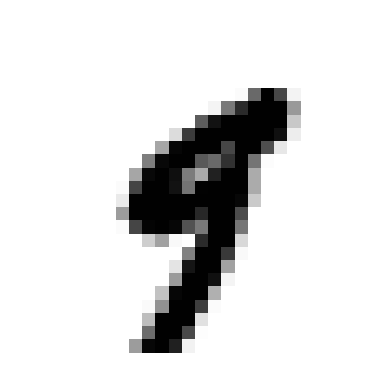

In [4]:
#Modelando o bando de dados usando um tamanho de 28x28 (formato padrao de imagens).


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()



Aqui fazemos a divisão dos dados para fazer o treino do modelo. X_train recebe os dados de 0 até 60000 e X_test recebe os dados de 60000 até o final. Parar y isso é analogo.

In [5]:
#Fazendo a divisão dos dados dentro do meu conjunto de dados.
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

Aqui usamos a função permutation para criar uma array de posições de 0 até 59999, mas colocando os numeros em uma ordem aleatoria, apos isso passamos o suffle_index como parametro para nossa conjuntos de dados então os dados são reoganizados conforme shuffle_index. Se o primeiro elemento da primeira posicão é a (posição 0) e ele recebe o parametro 366 de shuffle ele muda para a posição 366.

In [6]:
#permutando o conjunto de dados para garantir a uniformidade

import numpy as np
shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

Aqui criamos duas novas variaveis. Elas serão compostar por um vetor de booleanos. y_train_5 recebe o resultado da expressão questionando de o elemento de y_train é igual a 5. Se sim guarda True senão False. o mesmo acontece para y_test_5

In [7]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Aqui basicamente contamos quantas vezes o y_train guarda um valor igual a 5

In [8]:

import numpy as np
print(np.sum(y_train == 5))

5421


Aqui criamos um classificador simples que é capaz de dizer se um conjunto de dados é ou não tal valor. Atravez de uma função de custo(geralmente custo = (Ys - Ye)^2, onde o primeiro representa a resposta obtida e o segundo a resposta real) usamos então as derivadas parciais dessa funções para atuliazar as variaveis e chegar mais perto da função real que representa nossa curva.


In [9]:
#Criando um classificador SGD

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(X_train,y_train_5)



SGDClassifier(random_state=42)

Aqui basicamente usamos o metodo predict do classificador e verificamos se ele devolve a resposta correta para o valor de some_digit

In [10]:
sgd_clf.predict([some_digit])


array([False])

Aqui vamos pegar nosso conjunto de dados que esta nas duas variaveis X_train e y_train_5 vamos dividi-las em 3 conjuntos num total de 3 iteracções onde duas partes serão usadas para treinar o modelo e a restante será usada para teste. As variveis são alocadas em train_index e test_index, o classificador é clonado para clone_clf. Então as novas variaveis recebem os valores agora com o index da nova divisão de dados. clone_clf é treinado com o conjunto de dados, medimos a acurancia isso para cada iteração.

In [11]:
#Implementando cross validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,random_state=42,shuffle=True)

for train_index,test_index in skfolds.split(X_train,y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_fold = X_train[train_index]
  y_train_fold = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_fold,y_train_fold)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct/len(y_pred))

0.9647
0.9681
0.88675


In [ ]:
#Criando um classficador "Dumb"

from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score

class Never5Classifier(BaseEstimator):
  def fit(self,X,y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X),1),dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train,cv =3,scoring="accuracy")

array([0.099  , 0.097  , 0.10015])

A matriz de confusão é usada quando queremos fazer analise de um modelo, mas precisamos saber se ele está enviezado ou não. Divide-se então os dados dentro uma grade 2x2. Nas colunas ficam o que esperamos e o que ele previu. Nas linhas deixamos os o que ele acertou e o que errou. Nosso objetivo é a intercessão "O que ele previu"X"Correto". Isso nos dá uma boa ideia se o modelo é bom ou não.

In [ ]:
#matriz de confusão

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,sgd_clf.predict(X_train))

array([[52074,  2505],
       [  530,  4891]])

Precisão e Recall são metricas em analise de dados para dizer se um uma resposta de um conjunto de dados tem ou não acuracia. A primeira diz quanto acertei do total que foi computado. O segundo avalia quanto acertei dentro do que classifiquei como correto.

In [ ]:
from sklearn.metrics import precision_score,recall_score
#precision_score(y_train_5,sgd_clf.predict(X_train))
recall_score(y_train_5,sgd_clf.predict(X_train))

0.9022320605054418

F1 Score é um dado analitico que combina tanto o recall quanto precision atraves de uma média harmonica, penalisando valores muitos desbanlaceados.

In [ ]:
#Usando F1 Score

from sklearn.metrics import f1_score
y_pred_train = sgd_clf.predict(X_train)  # Predictions on the training set
f1_score(y_train_5, y_pred_train)

0.7632051182023875

Implementacao de uma funcao capaz de fazer a mesma operacao acima, mas agora mais explicito e configurando um limiar para onde a funcao deve se orientar

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Aqui estamos usando o metodo importado para dividir o conjunto de dados, pegar nosso classificador, fazer a analiase e devolver as acurancias para cada iteração em y_scores.

In [ ]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

Aqui usamos a função importada para separar os valores de precision, recalls, thresholds.

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

Aqui basicameente printamos na tela os valores de recalls, precisions no qual os eixos marca suas precisam e o threshold

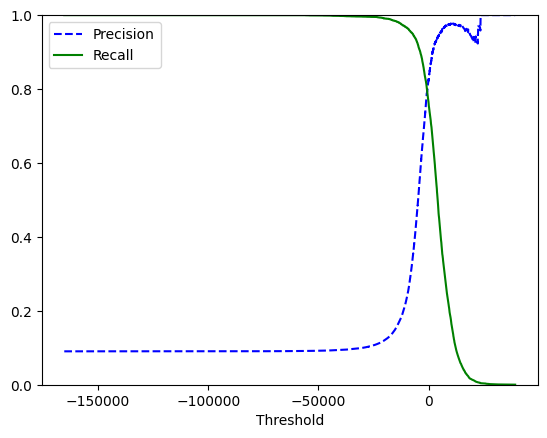

In [ ]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
  plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
  plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

Importamos a função ROC, passamos o os parametros como y_train_5 e y_scores para a função que devolve os valores para fpr(Taxa de falsos positivos), tpr(taxa de verdadeiros positivos) e o numero thresholds(numeros de iterações.

In [ ]:
from sklearn.metrics import roc_curve
fpr , tpr , thresholds = roc_curve(y_train_5,y_scores)

Aqui estamos plotando na tela o resultados dos nossos parametros e basicamente o que ele diz é: quando mais perto de da curva y  = 1 mais acurado é o seu modelo. Quando mais proximo de y = x pior ele é.

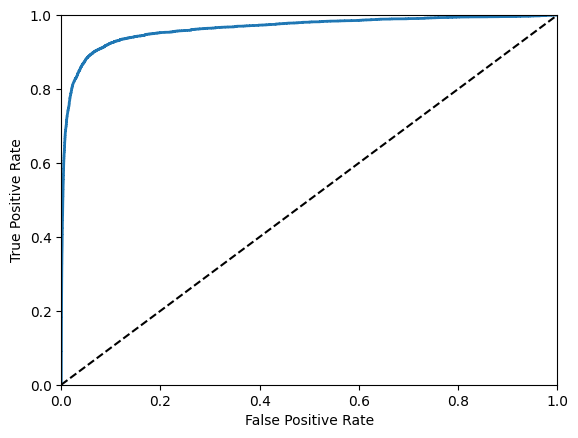

In [ ]:
def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],'k--')
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()

Aqui ele ocupa 96% da area, o que é muito bom.

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

np.float64(0.9639207440520065)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)


NameError: name 'fpr_forest' is not defined

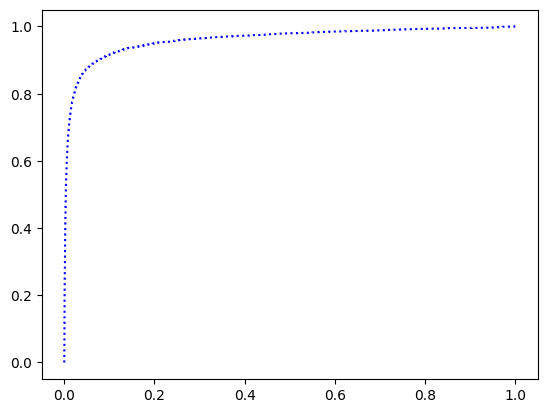

In [ ]:
# Treinando classficadores multiclasse

